In [1]:
import sys
sys.path.insert(0, "C:/Users/LENOVO/OneDrive/Escritorio/EDA_PROYECTO/utils")

from utils import plot_multiple_boxplots,plot_grouped_boxplots,plot_categorical_relationship_fin,plot_combined_graphs,plot_categorical_numerical_relationship,plot_grouped_histograms,grafico_dispersion_con_correlacion,bubble_plot,pinta_distribucion_categoricas,plot_histo_den
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 



In [2]:
# Leamos nuestro dataset para hacer nuestra primera exploracion 

df = pd.read_csv("C:/Users/LENOVO/OneDrive/Escritorio/EDA_PROYECTO/data/smoking.csv")

In [3]:
# Echemos una vista preliminar
df.head(10)

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
5,Female,37,Married,GCSE/O Level,British,White,"15,600 to 20,800",The North,No,NaN,NaN,NaN
6,Male,53,Married,Degree,British,White,"Above 36,400",The North,Yes,6.0,6.0,Packets
7,Male,44,Single,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
8,Male,40,Single,GCSE/CSE,English,White,"2,600 to 5,200",The North,Yes,8.0,8.0,Hand-Rolled
9,Female,41,Married,No Qualification,English,White,"5,200 to 10,400",The North,Yes,15.0,12.0,Packets


La Columna Gross_income, es tipo object, me gusta así porque esta de alguna manera categorizada, pero aun asi 
voy a crearme una version numerica con la media, de entre los valores, y voy a convertir unknown en NaN

In [4]:
df["gross_income"].value_counts()

# Crear un diccionario con los valores numéricos asignados
income_mapping = {
    '2,600 to 5,200': 3900,
    '5,200 to 10,400': 7800,
    '10,400 to 15,600': 13000,
    '15,600 to 20,800': 18600,
    '20,800 to 28,600': 24500,
    '28,600 to 36,400': 32200,
    'Above 36,400': 40000,
    'Under 2,600': 1300,
    'Refused': np.nan,  # Asignar Refused a NaN
    'Unknown': np.nan   # Asignar Unknown a NaN
}

# Asignar los valores numéricos utilizando el diccionario de mapeo
df['average_income'] = df['gross_income'].map(income_mapping)

# Mostrar el DataFrame resultante
print(df)

      gender  age marital_status highest_qualification nationality ethnicity  \
0       Male   38       Divorced      No Qualification     British     White   
1     Female   42         Single      No Qualification     British     White   
2       Male   40        Married                Degree     English     White   
3     Female   40        Married                Degree     English     White   
4     Female   39        Married          GCSE/O Level     British     White   
...      ...  ...            ...                   ...         ...       ...   
1686    Male   22         Single      No Qualification    Scottish     White   
1687  Female   49       Divorced      Other/Sub Degree     English     White   
1688    Male   45        Married      Other/Sub Degree    Scottish     White   
1689  Female   51        Married      No Qualification     English     White   
1690    Male   31        Married                Degree    Scottish     White   

          gross_income     region smoke

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   object 
 1   age                    1691 non-null   int64  
 2   marital_status         1691 non-null   object 
 3   highest_qualification  1691 non-null   object 
 4   nationality            1691 non-null   object 
 5   ethnicity              1691 non-null   object 
 6   gross_income           1691 non-null   object 
 7   region                 1691 non-null   object 
 8   smoke                  1691 non-null   object 
 9   amt_weekends           421 non-null    float64
 10  amt_weekdays           421 non-null    float64
 11  type                   421 non-null    object 
 12  average_income         1565 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 171.9+ KB


In [6]:
# Verificar duplicados
duplicados = df[df.duplicated()]

#Mostrar las filas duplicadas
print("Filas duplicadas:")
print(duplicados)

Filas duplicadas:
      gender  age marital_status highest_qualification nationality ethnicity  \
61    Female   76        Married      No Qualification     English     White   
190   Female   37        Married          GCSE/O Level     British     White   
243   Female   79        Widowed      No Qualification     English     White   
249   Female   68        Widowed      No Qualification     English     White   
269   Female   78        Widowed      No Qualification     English     White   
272     Male   16         Single          GCSE/O Level     English     White   
281   Female   38        Married          GCSE/O Level     English     White   
299   Female   33         Single              ONC/BTEC     British     White   
338   Female   64        Married      No Qualification     English     White   
349   Female   78        Widowed      No Qualification     English     White   
609     Male   79        Married      No Qualification     English     White   
643   Female   55     

Estas filas duplicadas, son normales, debemos tener en cuenta que algunos sujetos comparten caracteristicas,
Es decir, no es extraño que algunas filas sean iguales ya que el genero, estado civil,educacion etc..
No es dificil de que algunos sujetos concuerden.

Tambien, debemos comentar que los NaN que observamos son dependientes de si fuman o no,
No debemos interpretarlos como datos faltantes.

### TABLA DE DATOS 

**Dataset:**  smoke.csv  
**Descripción:** Datos sobre fumadores en UK   
**Periodo:**  2023 

| Nombre del campo    | Descripción      | Tipo de variable | Importancia Inicial | Notas  |
|---------------------|------------------|------------------|---------------------|--------|
| gender              | Género           | Binaria       | 1        | Notas1 |
| age                 | Edad             | Numérica         | 1        | Notas2 |
| marital_status      | Estado civil     | Categórica       | 2        | Notas3 |
| highest_qualification | Nivel educativo | Categórica       | 3        | Notas4 |
| nationality         | Nacionalidad     | Categórica       | 3        | Notas5 |
| ethnicity           | Etnia            | Categórica       | 3        | Notas6 |
| gross_income        | Salario Bruto    | Numérica         | 1       | Notas7 |
| region              | Región           | Categórica       | 2        | Notas8 |
| smoke               | Fumador          | Binaria       | 0        | Notas9 |
| amt_weekends        | Fumador en fines de semana | Numérica  | 2       | Notas10 |
| amt_weekdays        | Fumador diario   | Numérica         | 2       | Notas11 |
| type                | Tipo de tabaco   | Categórica       | 3       | Notas12 |


In [7]:
# Cardinalidad de las columnas.
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
gender,2,0.118273,object
age,79,4.671792,int64
marital_status,5,0.295683,object
highest_qualification,8,0.473093,object
nationality,8,0.473093,object
ethnicity,7,0.413956,object
gross_income,10,0.591366,object
region,7,0.413956,object
smoke,2,0.118273,object
amt_weekends,24,1.419279,float64


Ahora podemos hacer una clasificación directa por la cardinalidad, directamente los que tengan 2 serán binarios, los que tengan menos de 10 valores categóricas y el resto numéricas.   
Dentro de las numéricas, las que tengan % de cardinalidad superior al 30% las consideraremos continuas, el resto serán discretas y finalmente las de cardinalidad 100% serán indices.

In [8]:
df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
gender,2,0.118273,object,Binaria
age,79,4.671792,int64,Numerica Discreta
marital_status,5,0.295683,object,Categorica
highest_qualification,8,0.473093,object,Categorica
nationality,8,0.473093,object,Categorica
ethnicity,7,0.413956,object,Categorica
gross_income,10,0.591366,object,Categorica
region,7,0.413956,object,Categorica
smoke,2,0.118273,object,Binaria
amt_weekends,24,1.419279,float64,Numerica Discreta


ANALISIS UNIVARIANTE 

In [9]:
# Analizemos nuestras medias 

df.describe().loc["mean"]

age                  49.836192
amt_weekends         16.410926
amt_weekdays         13.750594
average_income    13511.884984
Name: mean, dtype: float64

In [10]:
# Analizemos nuestras medianas.

df.describe().loc["50%"]

age                 48.0
amt_weekends        15.0
amt_weekdays        12.0
average_income    7800.0
Name: 50%, dtype: float64

In [11]:
# Apliquemos la Moda a nuestras variables Categoricas, para hacernos una idea de la frecuencia.
# Creamos una lista.
columnas = df.columns
print(columnas)
Variables_categoricas = ['gender','marital_status','highest_qualification','nationality','ethnicity','gross_income','region','smoke','type']
df[Variables_categoricas].mode().T

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type', 'average_income'],
      dtype='object')


,0
gender,Female
marital_status,Married
highest_qualification,No Qualification
nationality,English
ethnicity,White
gross_income,"5,200 to 10,400"
region,Midlands & East Anglia
smoke,No
type,Packets


## FRECUENCIAS 

In [12]:
# hacemos un bucle para ver la frecuencia absoluta por medio value_counts.

for catego in Variables_categoricas:
    print(f"Para {catego}:")
    print(df[catego].value_counts())
    print('\n')

Para gender:
gender
Female    965
Male      726
Name: count, dtype: int64


Para marital_status:
marital_status
Married      812
Single       427
Widowed      223
Divorced     161
Separated     68
Name: count, dtype: int64


Para highest_qualification:
highest_qualification
No Qualification     586
GCSE/O Level         308
Degree               262
Other/Sub Degree     127
Higher/Sub Degree    125
A Levels             105
GCSE/CSE             102
ONC/BTEC              76
Name: count, dtype: int64


Para nationality:
nationality
English     833
British     538
Scottish    142
Other        71
Welsh        66
Irish        23
Refused      17
Unknown       1
Name: count, dtype: int64


Para ethnicity:
ethnicity
White      1560
Asian        41
Black        34
Chinese      27
Mixed        14
Refused      13
Unknown       2
Name: count, dtype: int64


Para gross_income:
gross_income
5,200 to 10,400     396
10,400 to 15,600    268
2,600 to 5,200      257
15,600 to 20,800    188
20,800 to 28,600 

Veamos las frecuencias, en graficos, para hacernos una mejor idea de la distribucion

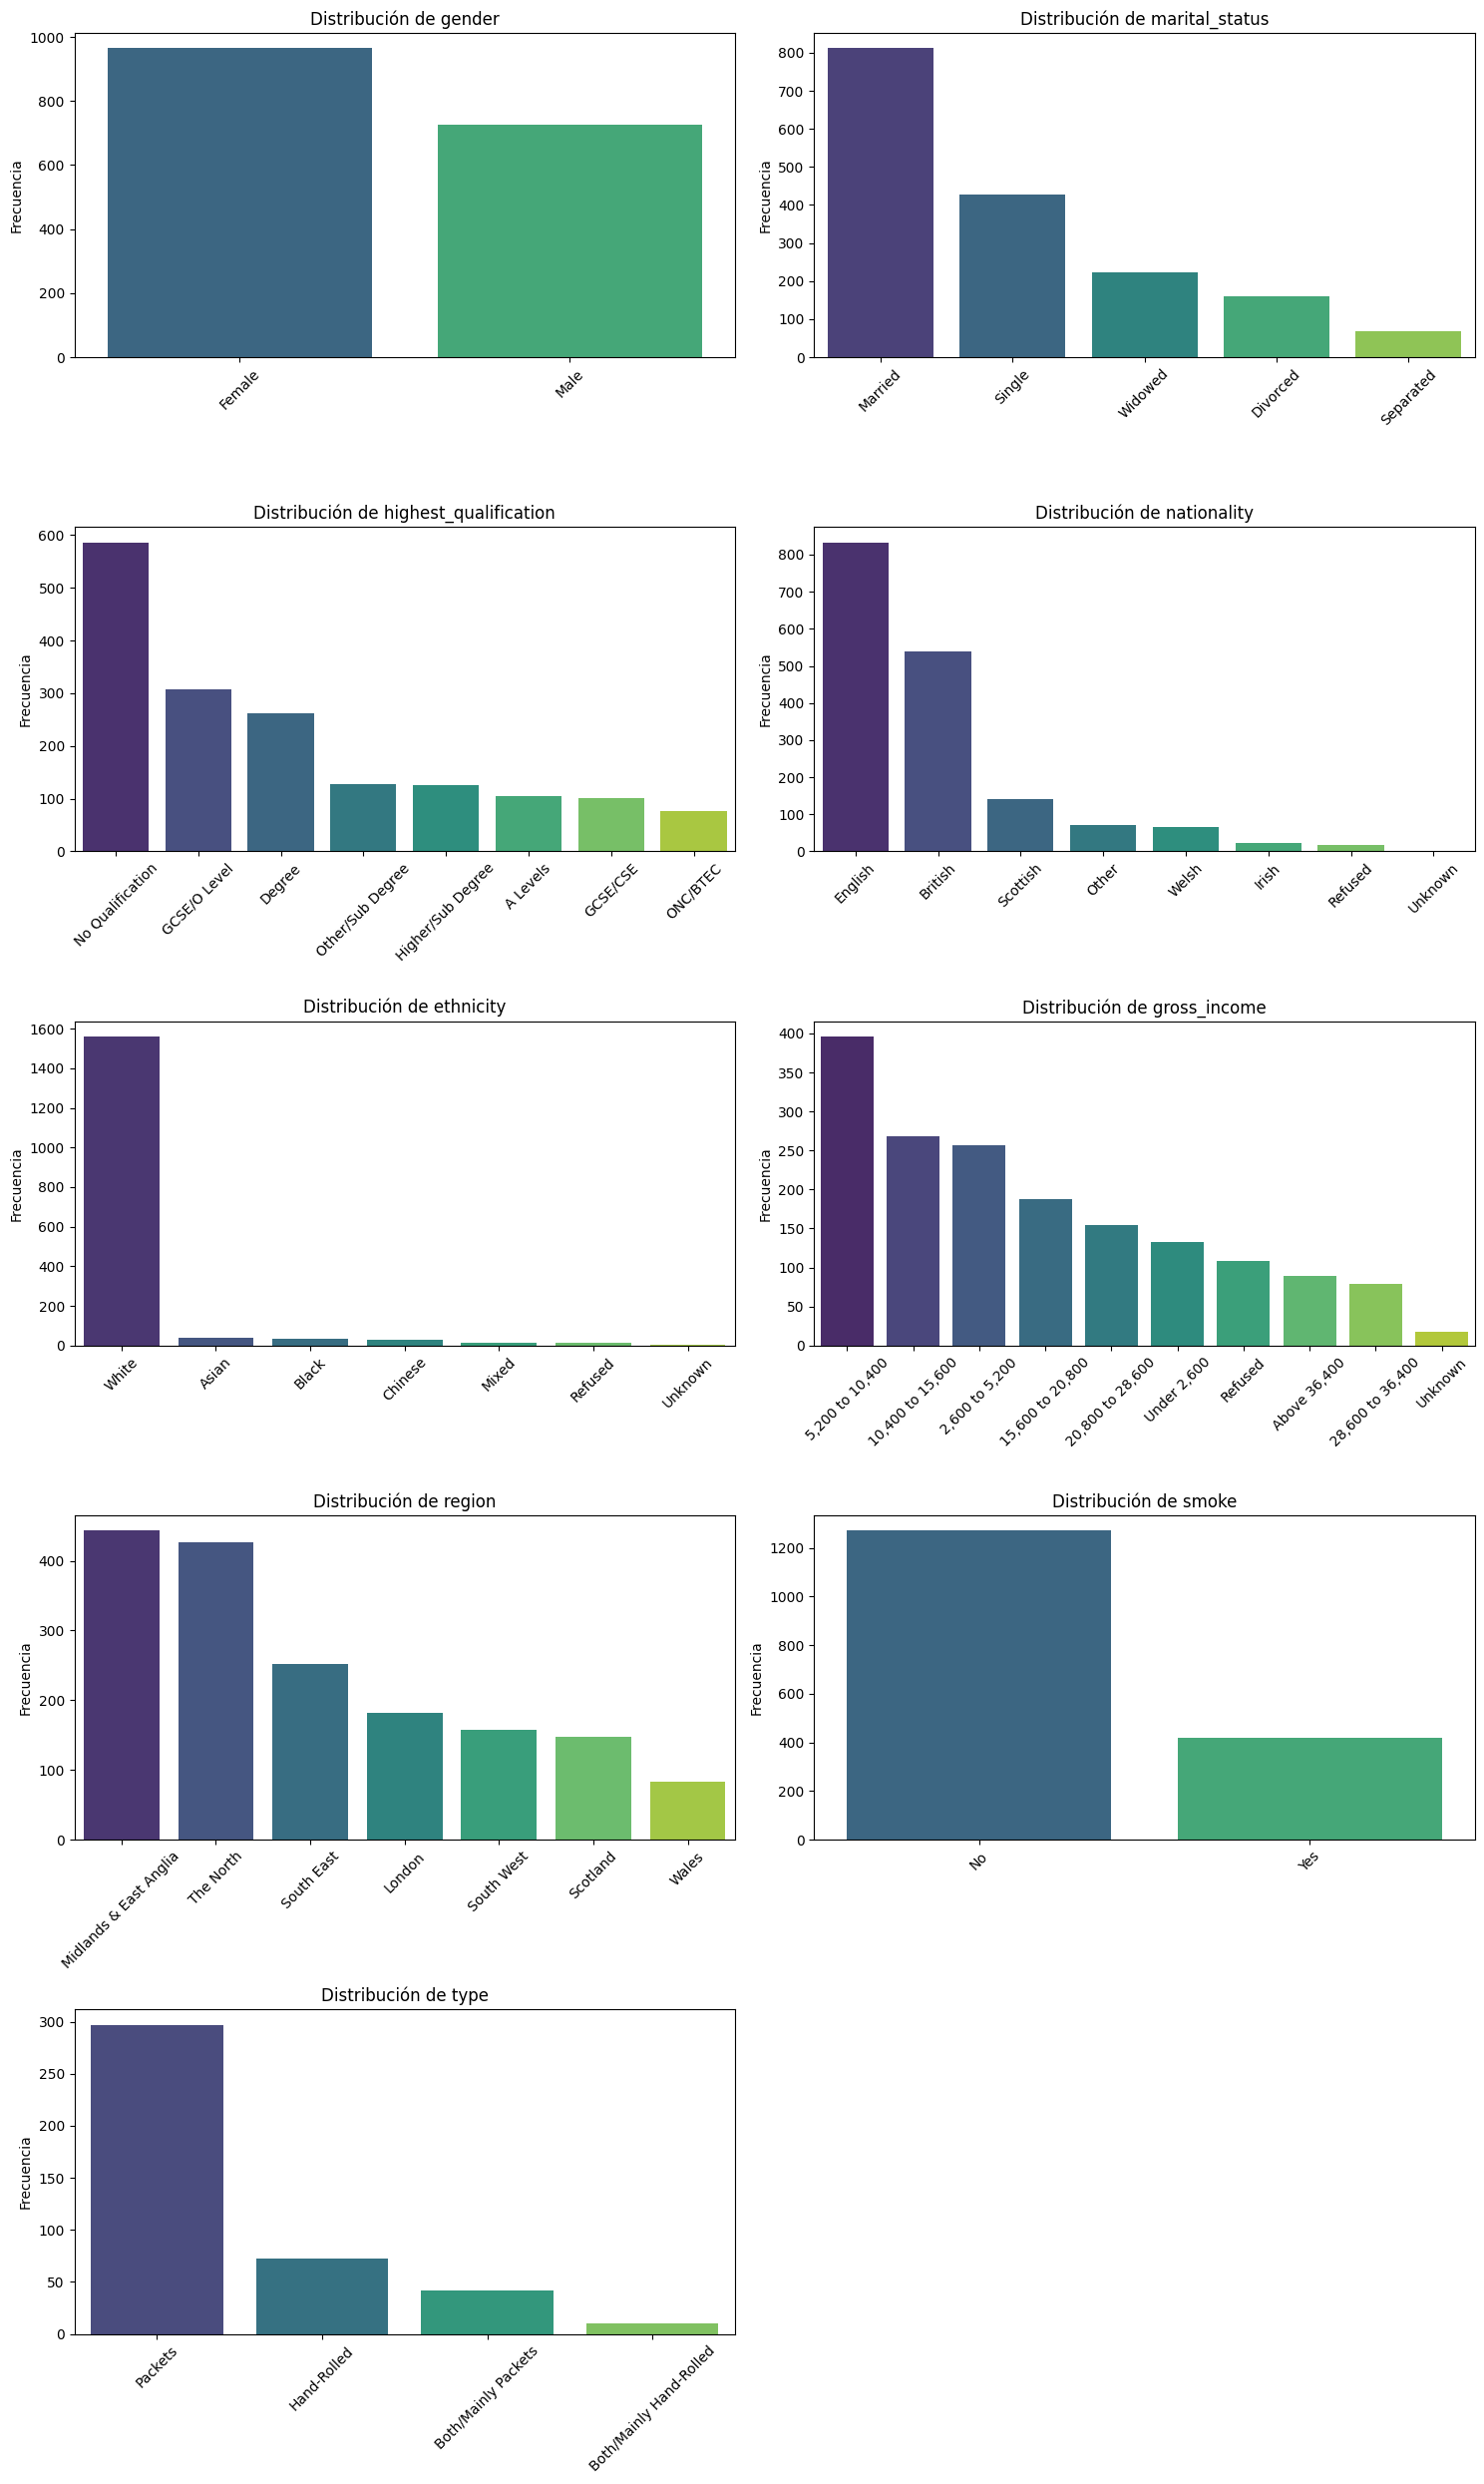

In [13]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total * 100)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
pinta_distribucion_categoricas(df,Variables_categoricas)

Por buenas praxis haremos la Frecuencia relativa. 

In [14]:
# Frecuencia Relativa con Value_counts()

for catego in Variables_categoricas:
    print(f"Para {catego}:")
    print(df[catego].value_counts()/len(df)*100)
    print('\n')

Para gender:
gender
Female    57.066824
Male      42.933176
Name: count, dtype: float64


Para marital_status:
marital_status
Married      48.018924
Single       25.251331
Widowed      13.187463
Divorced      9.520993
Separated     4.021289
Name: count, dtype: float64


Para highest_qualification:
highest_qualification
No Qualification     34.654051
GCSE/O Level         18.214075
Degree               15.493791
Other/Sub Degree      7.510349
Higher/Sub Degree     7.392076
A Levels              6.209344
GCSE/CSE              6.031934
ONC/BTEC              4.494382
Name: count, dtype: float64


Para nationality:
nationality
English     49.260792
British     31.815494
Scottish     8.397398
Other        4.198699
Welsh        3.903016
Irish        1.360142
Refused      1.005322
Unknown      0.059137
Name: count, dtype: float64


Para ethnicity:
ethnicity
White      92.253105
Asian       2.424601
Black       2.010645
Chinese     1.596688
Mixed       0.827912
Refused     0.768776
Unknown     0

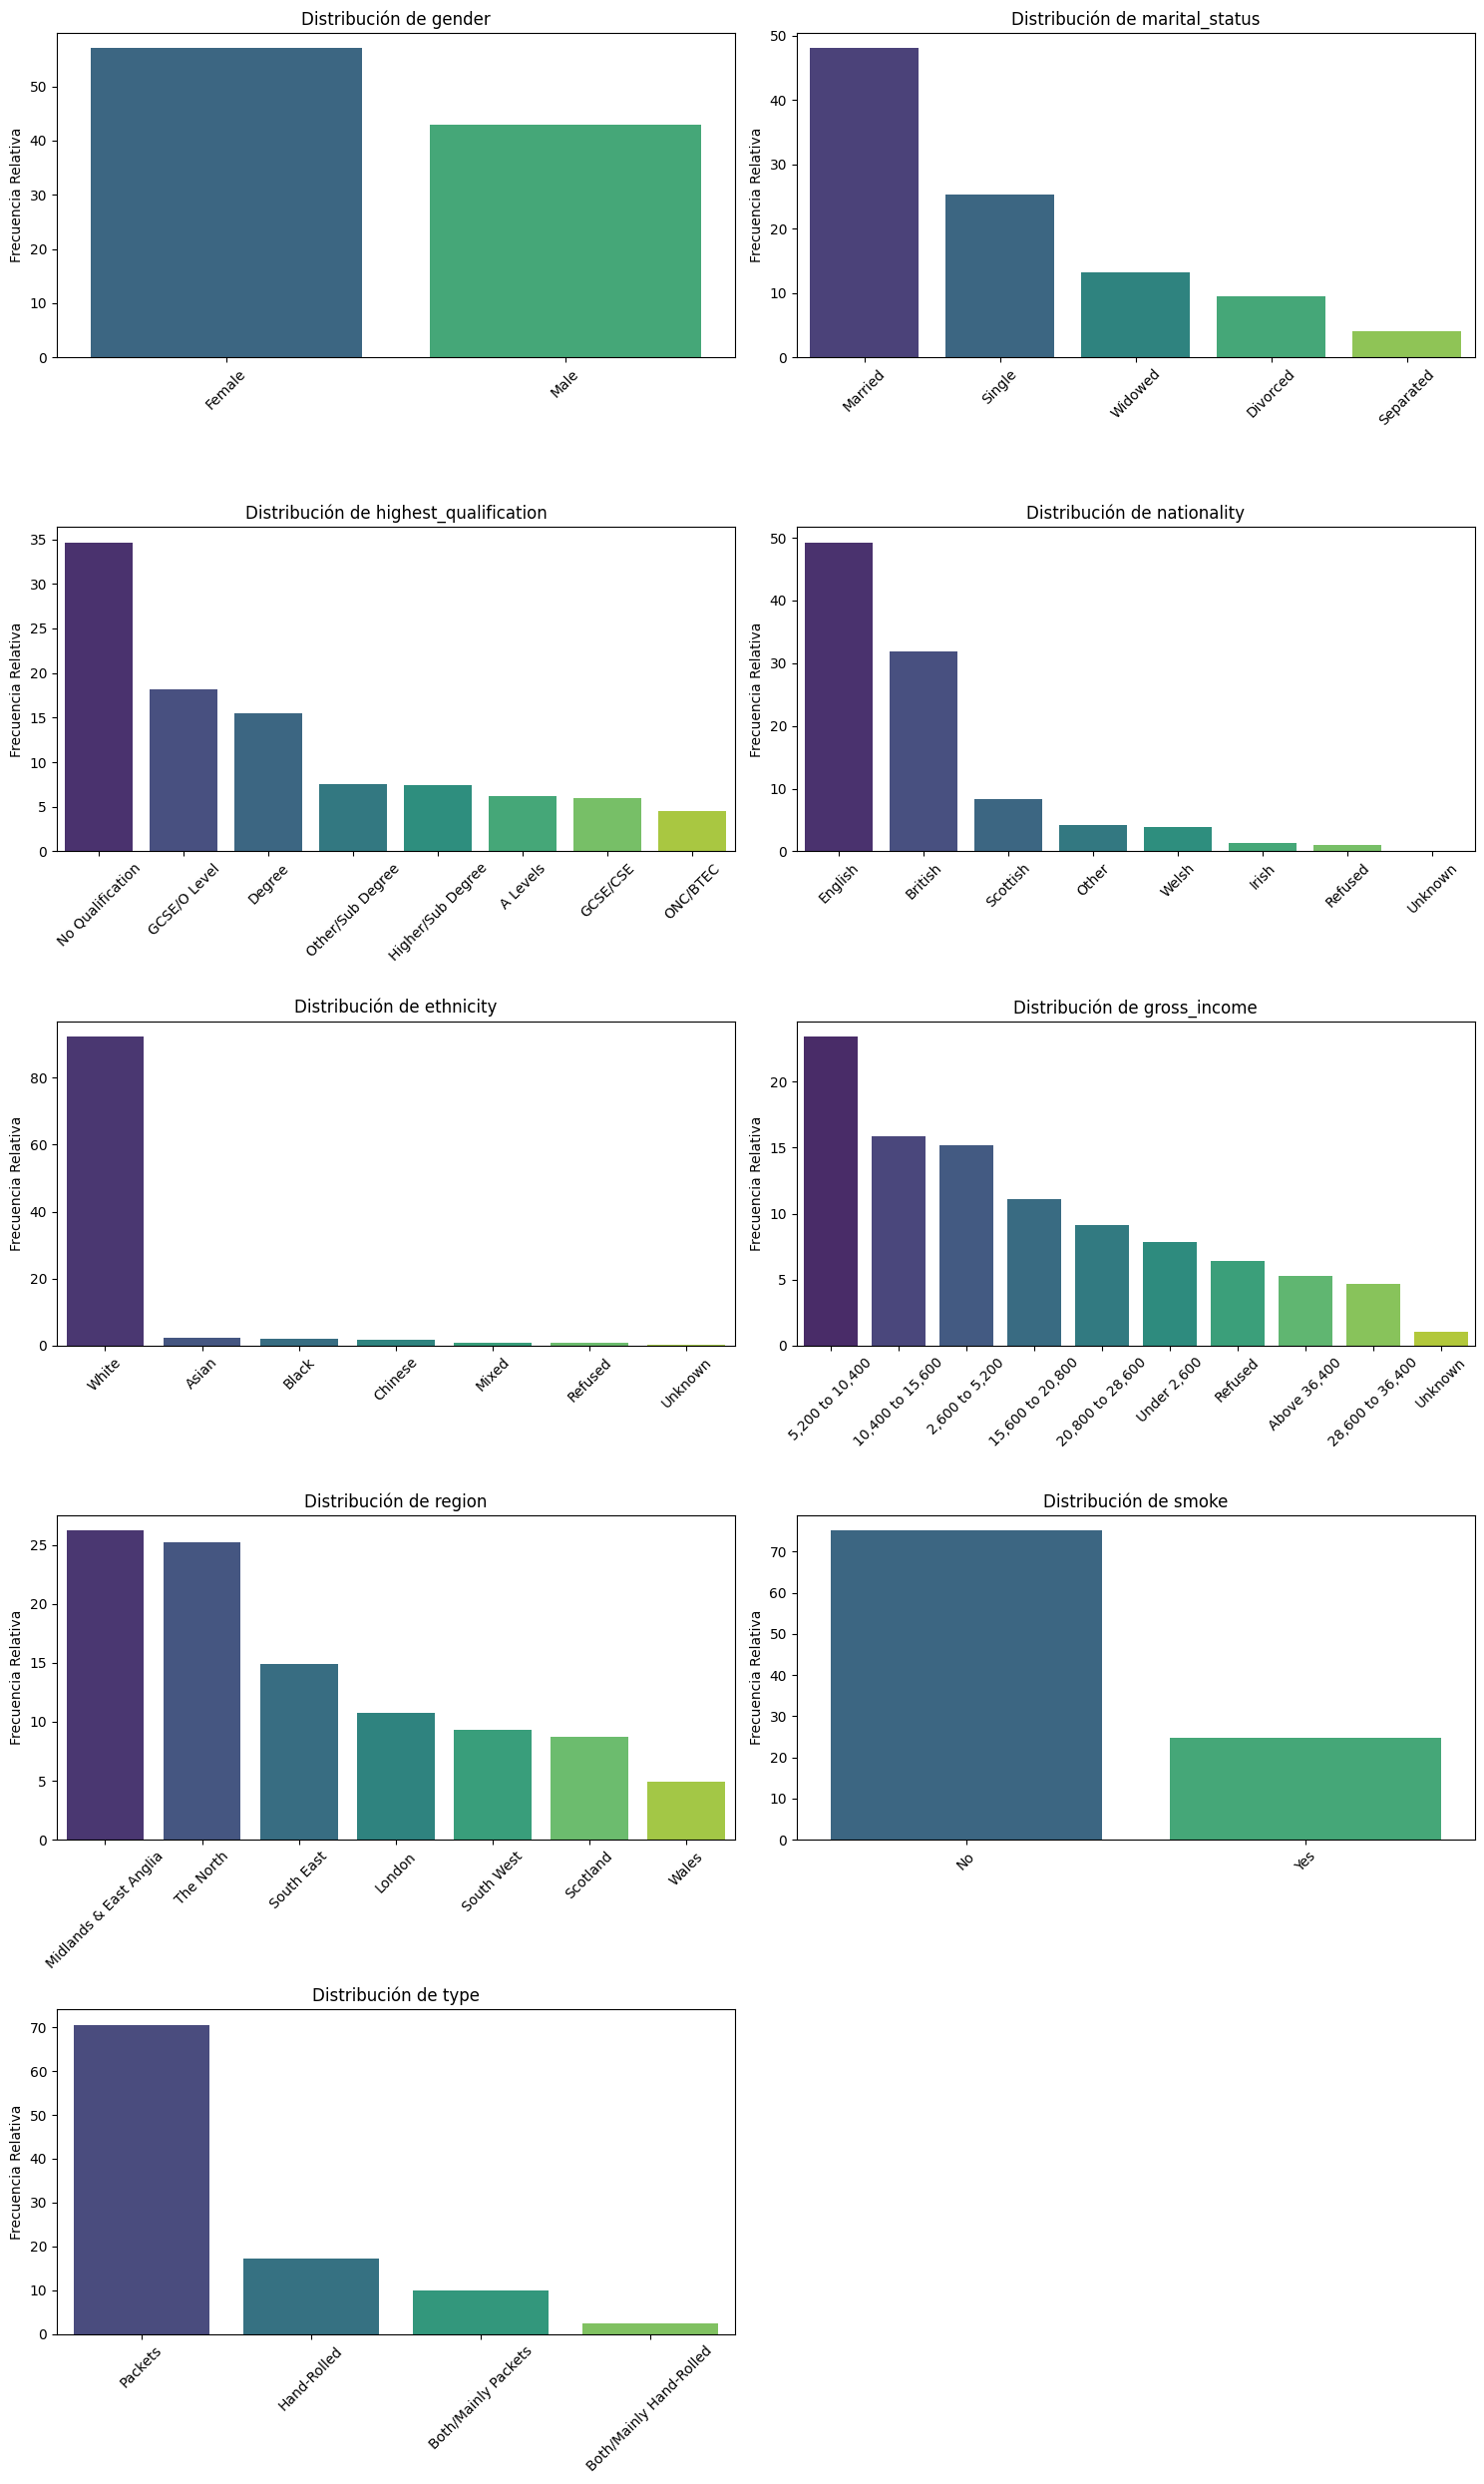

In [15]:
# Visualizacion de frecuencias relativas 

pinta_distribucion_categoricas(df,Variables_categoricas,relativa= True)

## MEDIDAS DE POSICION Y RANGO 

Importamos funciones :

In [16]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [17]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

PERCENTILES.

In [18]:
df.describe()

,age,amt_weekends,amt_weekdays,average_income
count,1691.000000,421.000000,421.000000,1565.000000
mean,49.836192,16.410926,13.750594,13511.884984
std,18.736851,9.892988,9.388292,10431.370493
min,16.000000,0.000000,0.000000,1300.000000
25%,34.000000,10.000000,7.000000,7800.000000
50%,48.000000,15.000000,12.000000,7800.000000
75%,65.500000,20.000000,20.000000,18600.000000
max,97.000000,60.000000,55.000000,40000.000000


In [19]:
# Debemos ordenar los Datos para sacar el IQR.
df = df.sort_values(by='age')
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,average_income
1451,Male,16,Single,No Qualification,English,White,"Under 2,600",South West,Yes,6.0,6.0,Both/Mainly Packets,1300.0
1631,Female,16,Single,No Qualification,Scottish,White,Refused,Scotland,No,NaN,NaN,NaN,NaN
232,Male,16,Single,GCSE/O Level,English,White,Refused,The North,No,NaN,NaN,NaN,NaN
209,Female,16,Single,GCSE/O Level,British,White,"5,200 to 10,400",The North,Yes,12.0,12.0,Packets,7800.0
1655,Male,16,Single,No Qualification,Scottish,White,Refused,Scotland,No,NaN,NaN,NaN,NaN


In [20]:
#Observemos los IQR de Age 
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

print(get_IQR(df,"age"))


31.5


* Si el IQR es mucho mayor que la mediana (por ejemplo más de un 50%) podríamos pensar en una variable con valores bastante dispersos (y por tanto las medidas de tendencia central hay que considerarlas con más cuidado)  
+ Podemos comparar el IQR con la diferencia entre valor máximo y mínimo (lo que veremos en un momento que es el rango) y si el IQR es comparable entonces de nuevo podremos hablar de una variable dispersa

In [21]:
# Para no crear una lista con las variables numericas, usaremos este truco : 

columnas_numericas = df.describe().T.index.to_list()
print(columnas_numericas)

['age', 'amt_weekends', 'amt_weekdays', 'average_income']


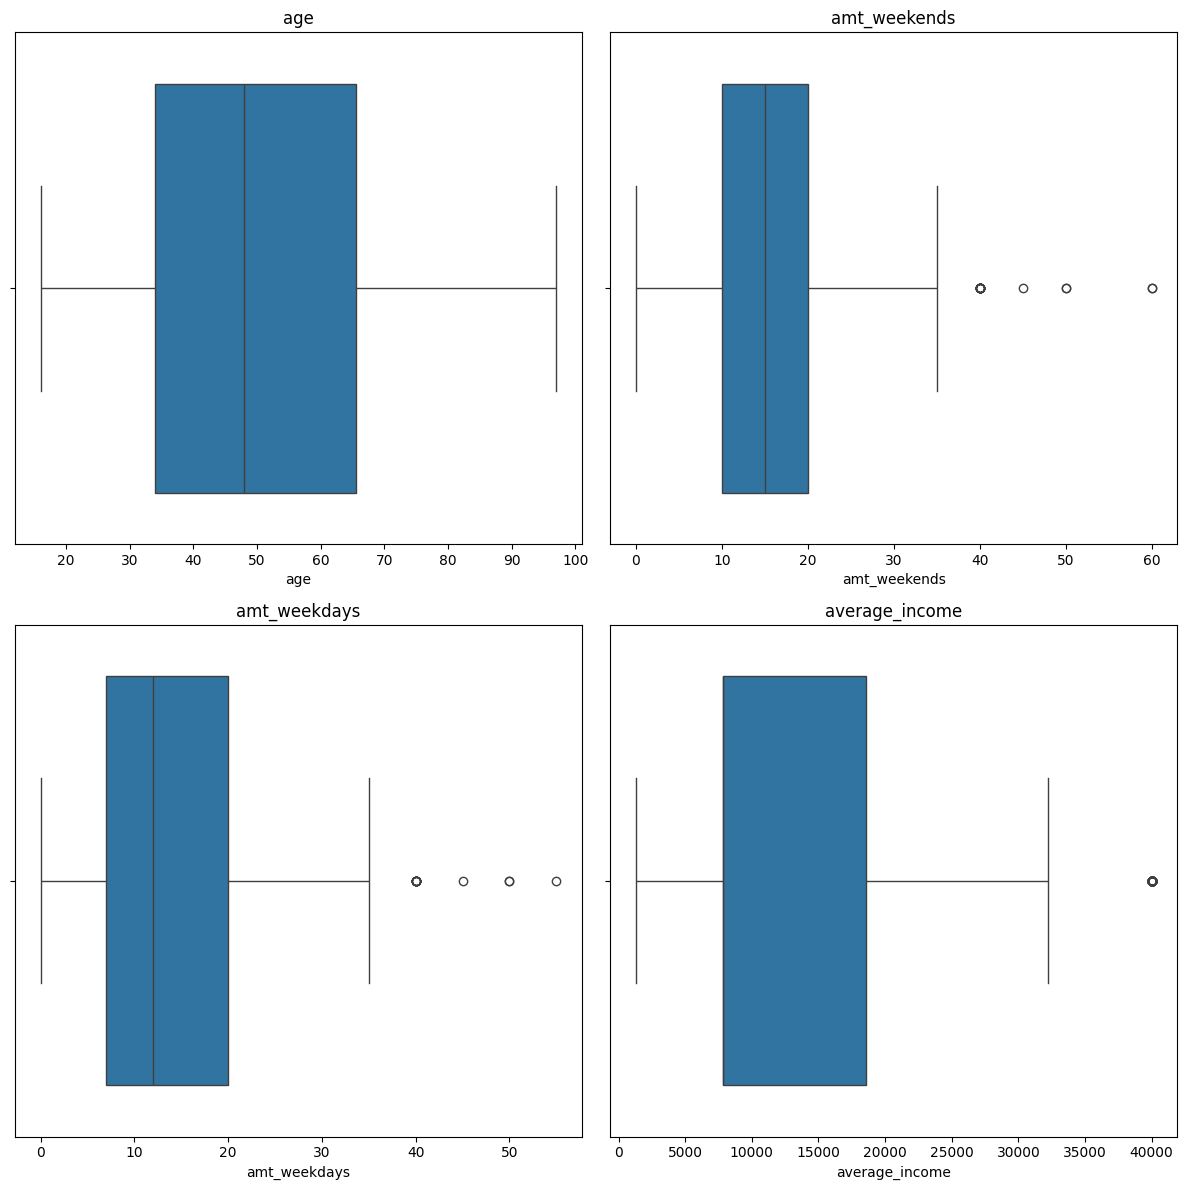

In [22]:
plot_multiple_boxplots(df,columnas_numericas)

In [23]:
# RANGOS
df.describe().loc["max"] - df.describe().loc["min"]

age                  81.0
amt_weekends         60.0
amt_weekdays         55.0
average_income    38700.0
dtype: float64

In [24]:
# Dispersion 

df.describe().loc[["std","mean"]].T

,std,mean
age,18.736851,49.836192
amt_weekends,9.892988,16.410926
amt_weekdays,9.388292,13.750594
average_income,10431.370493,13511.884984


In [25]:
# Variabilidad 

def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var 
variabilidad(df)

,std,mean,CV
age,18.736851,49.836192,0.375969
amt_weekends,9.892988,16.410926,0.602829
amt_weekdays,9.388292,13.750594,0.682755
average_income,10431.370493,13511.884984,0.772014


Valores atípicos o outliers: La presencia de valores extremos en los datos puede aumentar la variabilidad, ya que estos valores atípicos pueden estar muy lejos del resto de los datos.

Coeficiente de variación alto: El coeficiente de variación es una medida de la variabilidad relativa de los datos en relación con su media. Cuanto mayor sea el coeficiente de variación, mayor será la variabilidad en relación con la media.



## Distribucion 

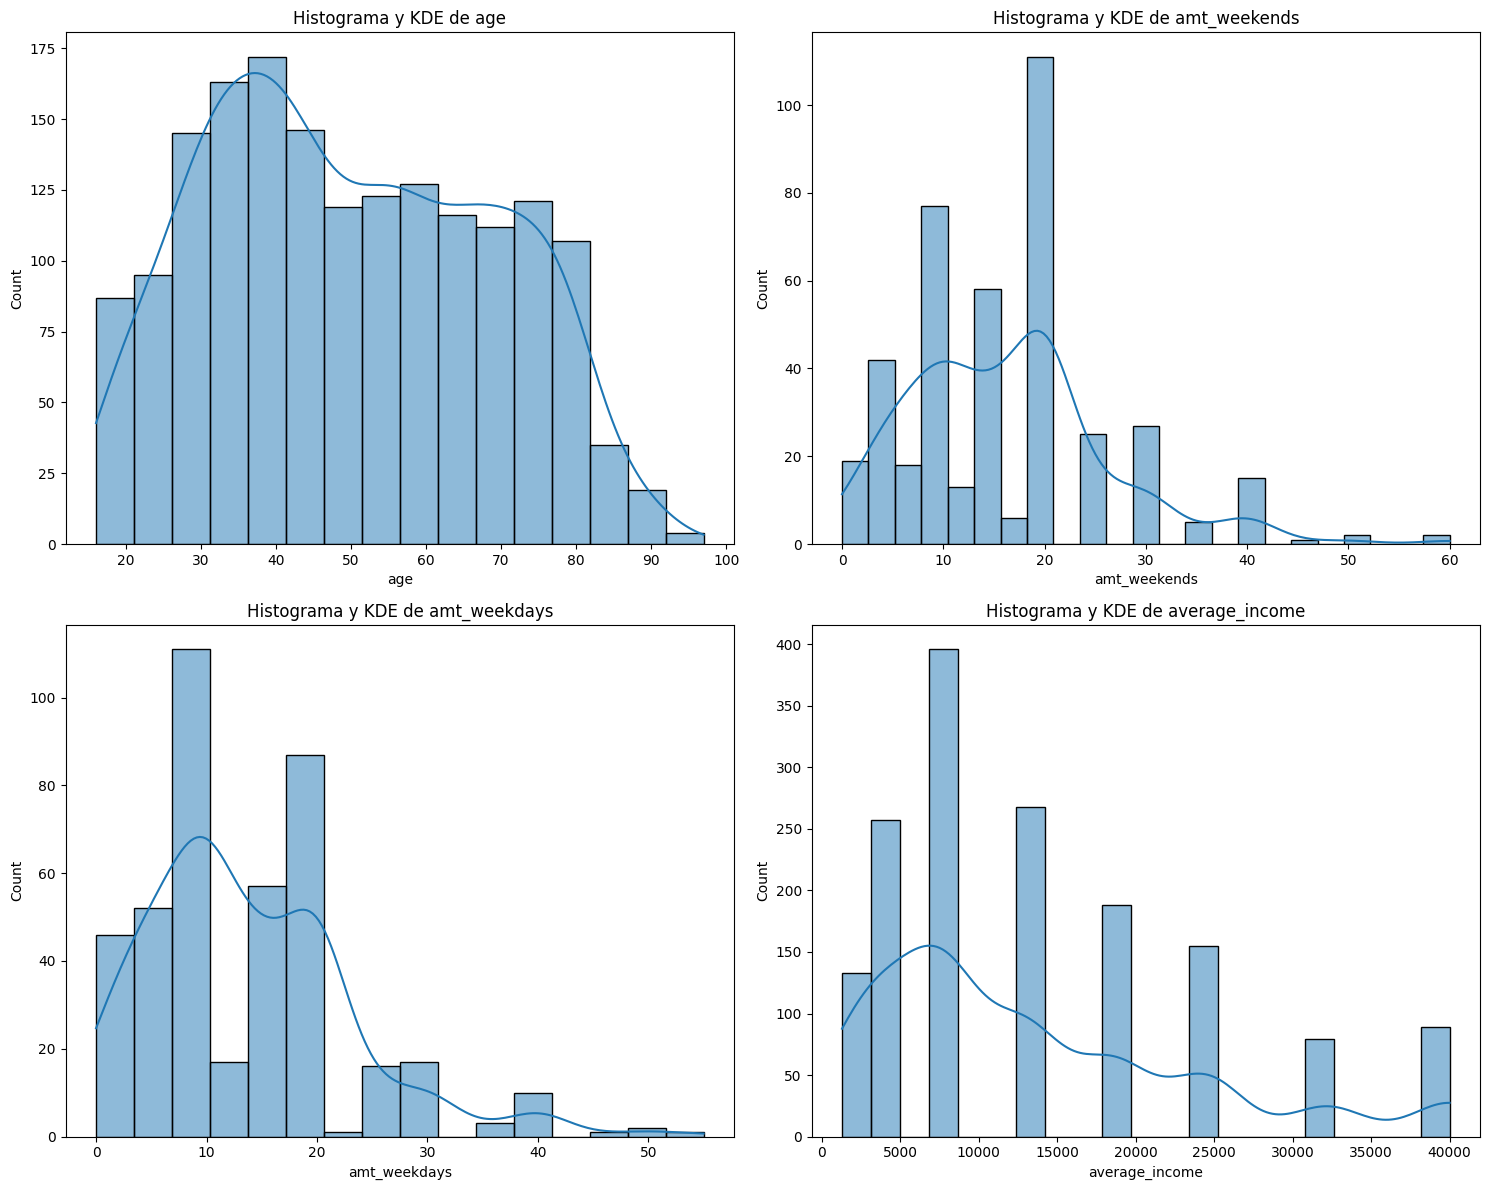

In [26]:
columnas_numericas = df.describe().columns.to_list()
plot_histo_den(df,columnas_numericas)

(4, 2)


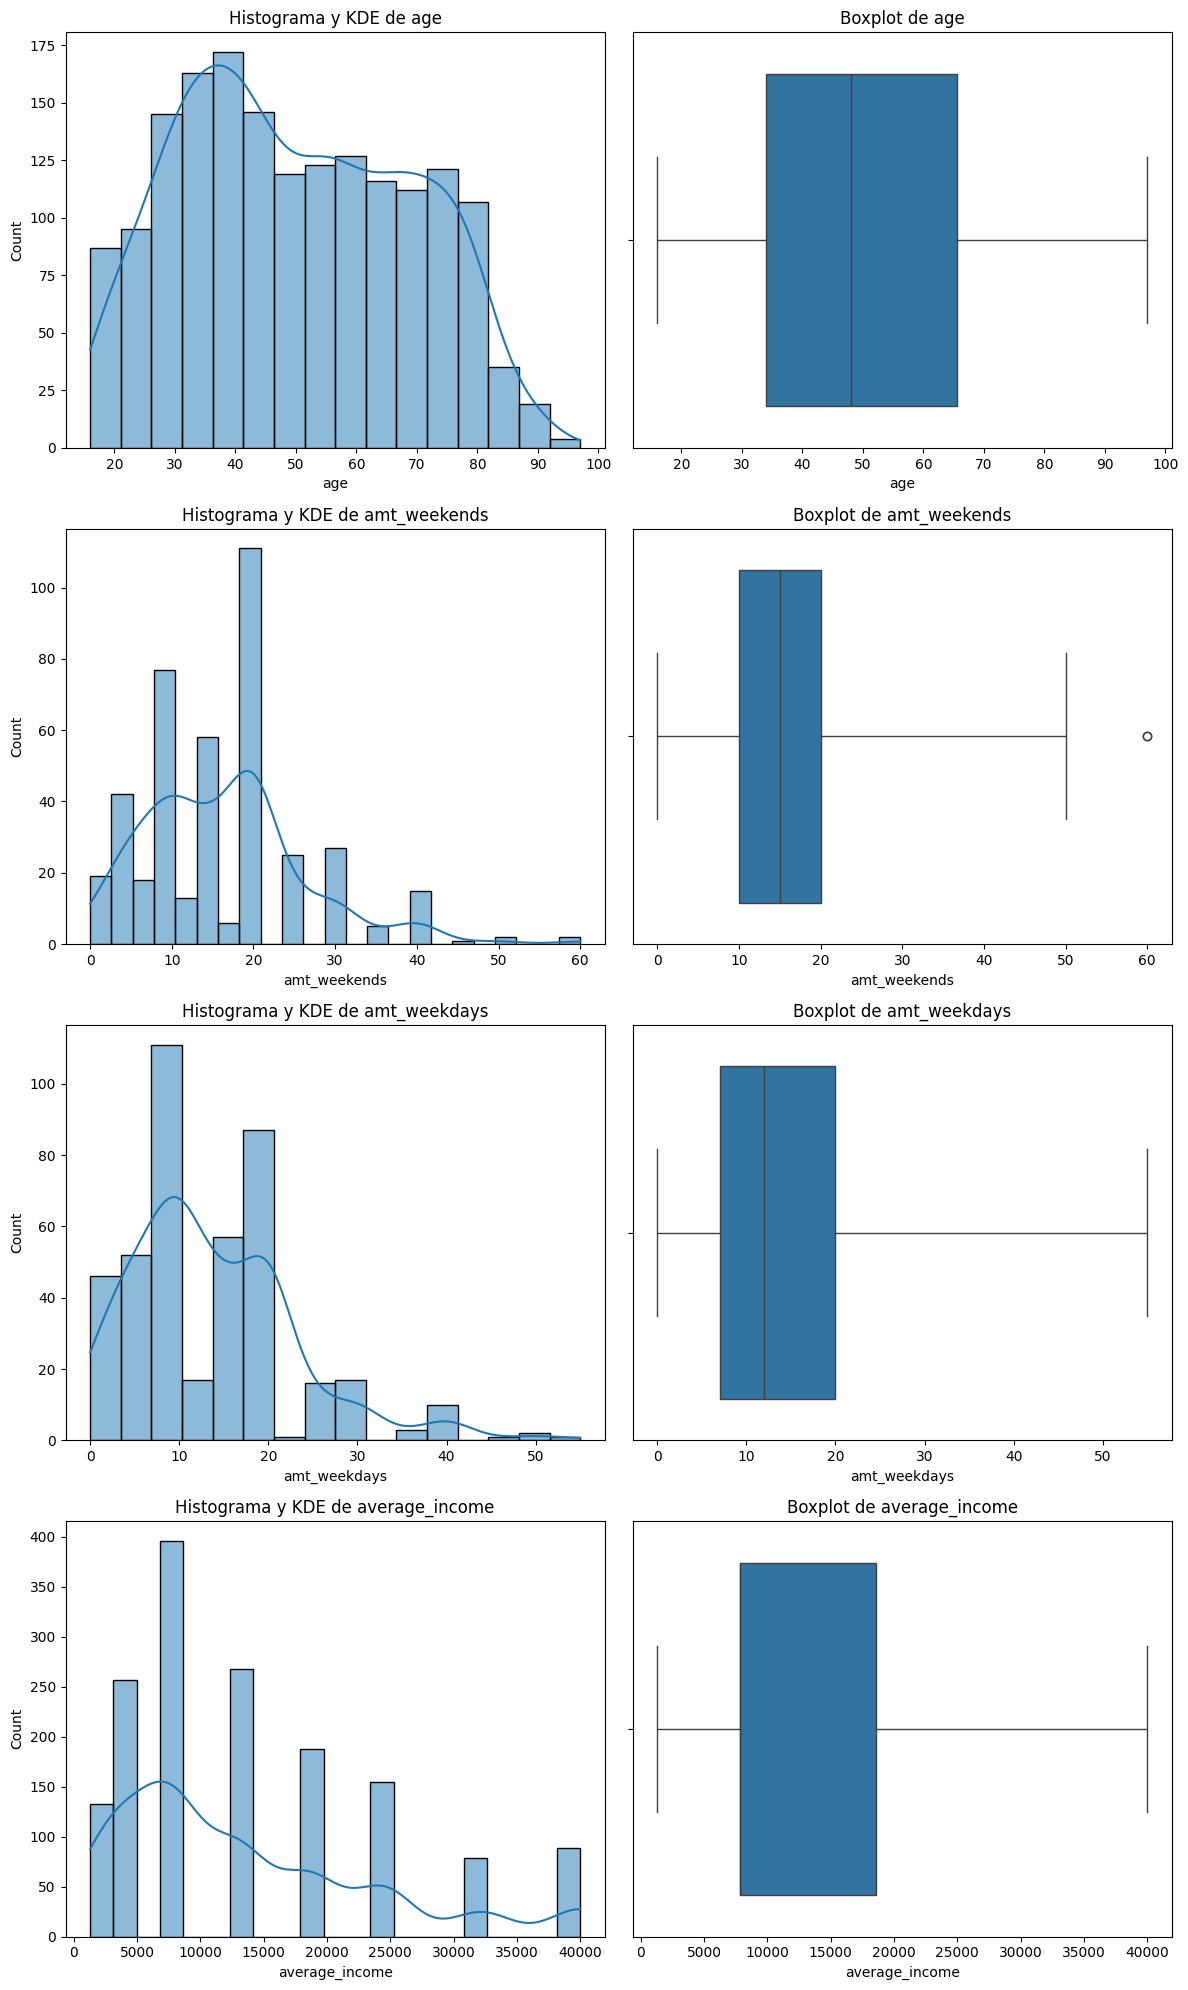

In [27]:
# Deteccion de outliers 
columnas_numericas = df.describe().columns.to_list()

plot_combined_graphs(df, columns = columnas_numericas, whisker_width=3)

Observamos valores atipicos en el salario lo cual tiene sentido y tambien observamos un outlier en atm weekends.
No es relevante para este eda.

## ANALISIS BIVARIANTE

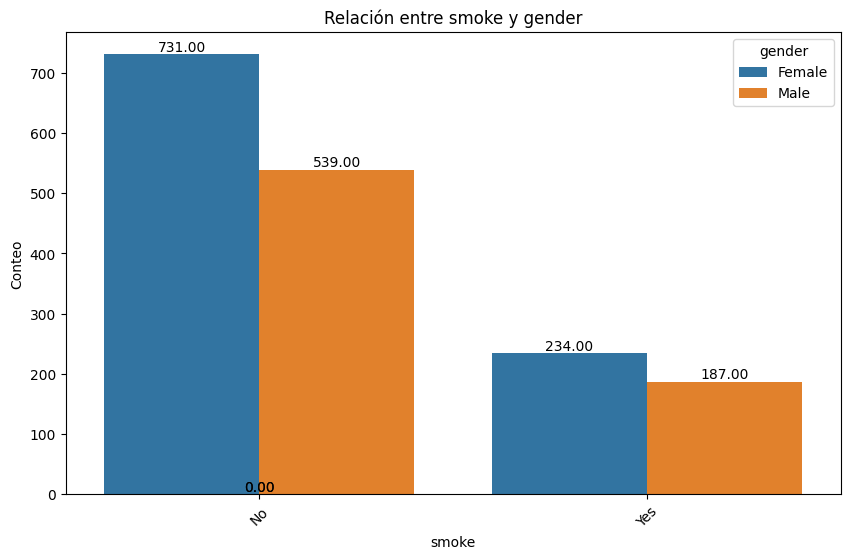

In [28]:
# Relacion de Fumadores por Genero.

plot_categorical_relationship_fin(df, "smoke","gender", show_values= True)

TEST CHI CUADRADO:

$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$


* h0 = hipotesis nula = no hay relacion sifnificante entre variables 
* h1 = hipotesis alternativa = existe relacion significante entre variables. 




In [32]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


In [31]:


tabla_contingencia = pd.crosstab(df['smoke'], df['gender'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)




print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# Comprobar si la asociación es significativa
alpha = 0.05
if p < alpha:
    print("\nExiste una asociación significativa variables")
else:
    print("\nNo existe una asociación significativa entre variables.")


Valor Chi-Cuadrado: 0.4269900285762064
P-Value: 0.5134696034678925
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[724.74866943 545.25133057]
 [240.25133057 180.74866943]]

No existe una asociación significativa entre variables.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26044\1692272410.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=df['age'], x=df['smoke'], palette=['black', 'salmon'], ax=axes[1])


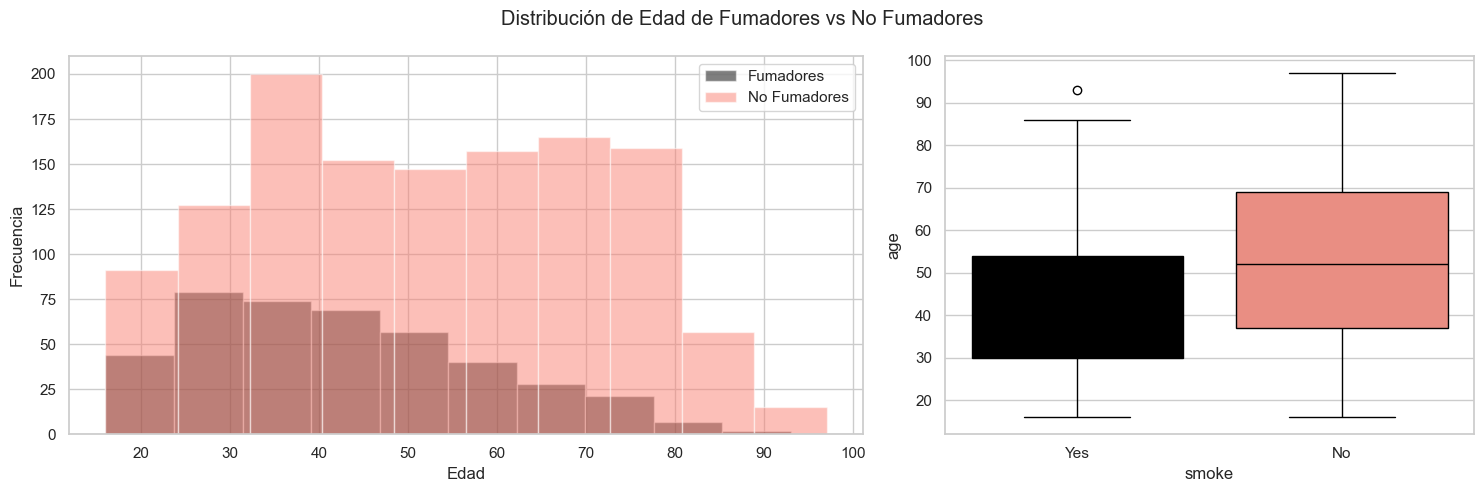

In [ ]:
# Relacion de fumadores por edad.

# Definir los grupos de fumadores y no fumadores
smoker = df[df['smoke'] == 'Yes']
non_smoker = df[df['smoke'] == 'No']

# Visualización
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1.5, 1]})

# Histograma de la edad para fumadores y no fumadores
axes[0].hist(smoker['age'], alpha=0.5, label='Fumadores', color='black')
axes[0].hist(non_smoker['age'], alpha=0.5, label='No Fumadores', color='salmon')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Boxplot de la edad para fumadores y no fumadores
sns.boxplot(data=df, y=df['age'], x=df['smoke'], palette=['black', 'salmon'], ax=axes[1])

# Título de la figura
fig.suptitle('Distribución de Edad de Fumadores vs No Fumadores')
plt.tight_layout()
plt.show()

TEST CHI CUADRADO:

$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$

* h0 = hipotesis nula = no hay relacion sifnificante entre variables 
* h1 = hipotesis alternativa = existe relacion significante entre variables. 




In [ ]:

tabla_contingencia = pd.crosstab(df['smoke'], df['age'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)




print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# Comprobar si la asociación es significativa
alpha = 0.05
if p < alpha:
    print("\nExiste una asociación significativa variables")
else:
    print("\nNo existe una asociación significativa entre variables.")

Valor Chi-Cuadrado: 159.26113392167045
P-Value: 1.63071097831109e-07
Grados de Libertad: 78
Tabla de Frecuencias Esperadas:
 [[11.26552336  9.76345358 16.52276759  8.2613838   9.01241869 10.51448847
  11.26552336 12.76759314 19.52690716 13.51862803 14.26966292 16.52276759
  22.53104672 19.52690716 21.78001183 28.53932584 18.02483737 27.03725606
  30.04139562 23.28208161 24.0331165  24.78415139 23.28208161 25.53518628
  32.2945003  23.28208161 27.78829095 15.02069781 24.78415139 25.53518628
  16.52276759 17.27380248 15.02069781 23.28208161 15.7717327  18.02483737
  15.02069781 15.7717327  25.53518628 23.28208161 12.76759314 25.53518628
  17.27380248 21.02897694 11.26552336 20.27794205 13.51862803 15.7717327
  21.02897694 18.02483737 18.77587226 17.27380248 17.27380248 22.53104672
  13.51862803 13.51862803 23.28208161 23.28208161  9.76345358 15.7717327
  18.77587226 15.02069781 21.02897694 18.77587226 12.01655825 13.51862803
   9.76345358  3.00413956  3.75517445  3.75517445  6.00827912  

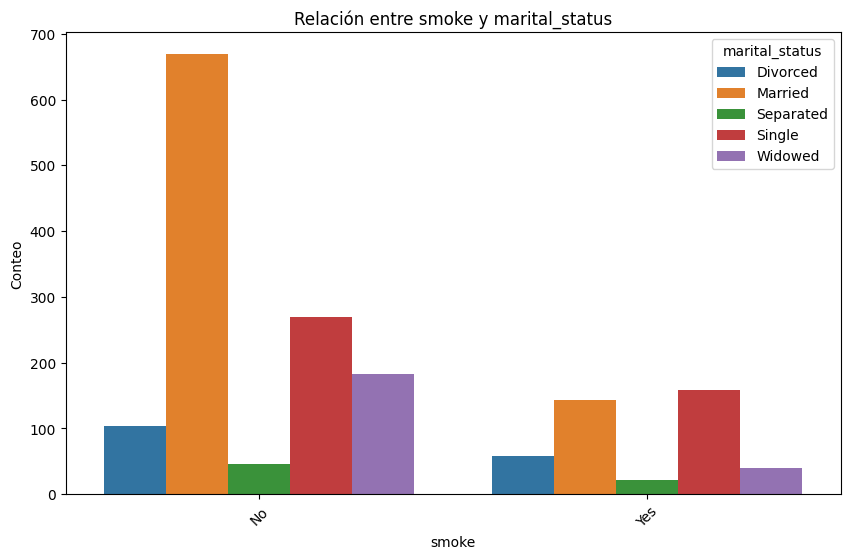

In [30]:
# Distribucion de fumadores por estado civil 

plot_categorical_relationship_fin(df,"smoke","marital_status")

TEST CHI CUADRADO:

$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$


* h0 = hipotesis nula = no hay relacion sifnificante entre variables 
* h1 = hipotesis alternativa = existe relacion significante entre variables. 

In [33]:
tabla_contingencia = pd.crosstab(df['smoke'], df['marital_status'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)




print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# Comprobar si la asociación es significativa
alpha = 0.05
if p < alpha:
    print("\nExiste una asociación significativa variables")
else:
    print("\nNo existe una asociación significativa entre variables.")

Valor Chi-Cuadrado: 74.97978582715777
P-Value: 2.0123016499765445e-15
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[120.91661739 609.84033116  51.07037256 320.69189829 167.4807806 ]
 [ 40.08338261 202.15966884  16.92962744 106.30810171  55.5192194 ]]

Existe una asociación significativa variables


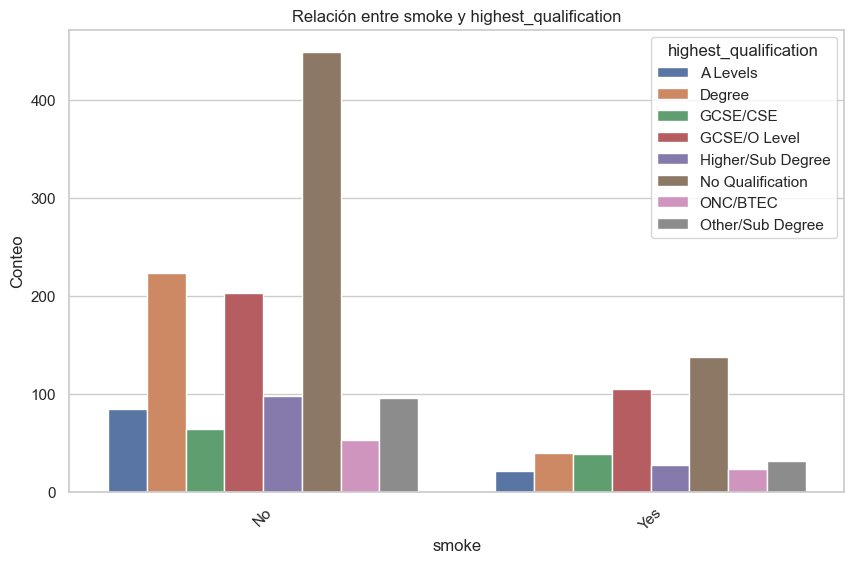

In [ ]:
# Distribucion de fumadores por nivel de educacion 

plot_categorical_relationship_fin(df,"smoke","highest_qualification")

TEST CHI CUADRADO:

$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$

* h0 = hipotesis nula = no hay relacion sifnificante entre variables 
* h1 = hipotesis alternativa = existe relacion significante entre variables. 

In [ ]:
tabla_contingencia = pd.crosstab(df['smoke'], df['highest_qualification'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)




print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# Comprobar si la asociación es significativa
alpha = 0.05
if p < alpha:
    print("\nExiste una asociación significativa variables")
else:
    print("\nNo existe una asociación significativa entre variables.")

Valor Chi-Cuadrado: 40.28107640853026
P-Value: 1.1120783602265794e-06
Grados de Libertad: 7
Tabla de Frecuencias Esperadas:
 [[ 78.85866351 196.77114134  76.60555884 231.3187463   93.87936132
  440.10644589  57.07865169  95.38143111]
 [ 26.14133649  65.22885866  25.39444116  76.6812537   31.12063868
  145.89355411  18.92134831  31.61856889]]

Existe una asociación significativa variables


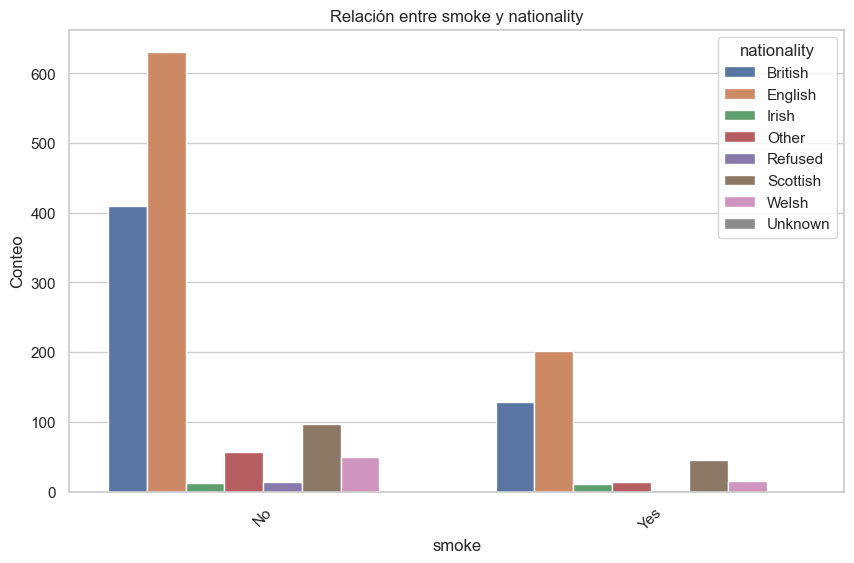

In [ ]:
# Distribucion de fumadores vs no fumadores por nacionalidad

plot_categorical_relationship_fin(df,"smoke","nationality")

TEST CHI CUADRADO:

$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$

* h0 = hipotesis nula = no hay relacion sifnificante entre variables 
* h1 = hipotesis alternativa = existe relacion significante entre variables. 

In [ ]:
tabla_contingencia = pd.crosstab(df['smoke'], df['nationality'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)




print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# Comprobar si la asociación es significativa
alpha = 0.05
if p < alpha:
    print("\nExiste una asociación significativa variables")
else:
    print("\nNo existe una asociación significativa entre variables.")

Valor Chi-Cuadrado: 14.92931481102357
P-Value: 0.036916235411061545
Grados de Libertad: 7
Tabla de Frecuencias Esperadas:
 [[4.04056771e+02 6.25612064e+02 1.72738025e+01 5.33234772e+01
  1.27675931e+01 1.06646954e+02 7.51034891e-01 4.95683028e+01]
 [1.33943229e+02 2.07387936e+02 5.72619752e+00 1.76765228e+01
  4.23240686e+00 3.53530455e+01 2.48965109e-01 1.64316972e+01]]

Existe una asociación significativa variables


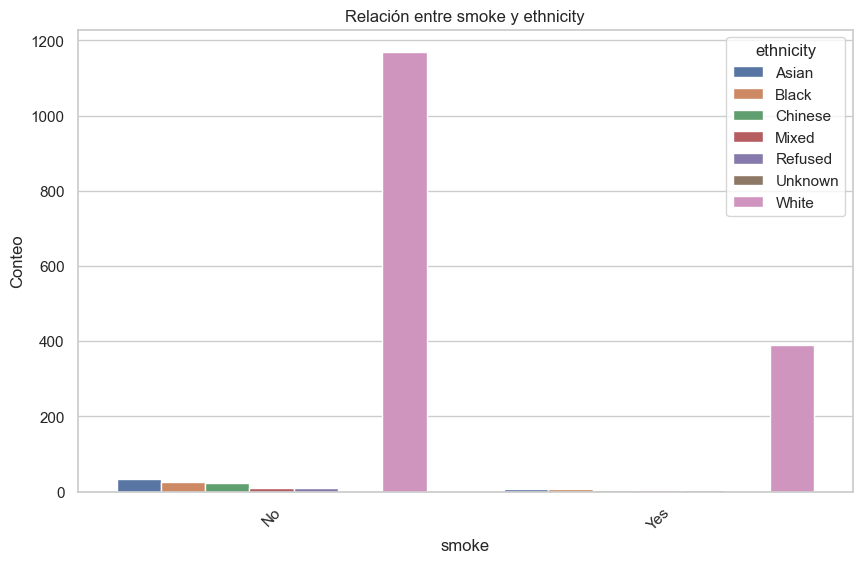

In [ ]:
# Distribucion de fumadores vs no fumadores por nacionalidad

plot_categorical_relationship_fin(df,"smoke","ethnicity")

TEST CHI CUADRADO:

$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$

* h0 = hipotesis nula = no hay relacion sifnificante entre variables 
* h1 = hipotesis alternativa = existe relacion significante entre variables. 

In [ ]:
tabla_contingencia = pd.crosstab(df['smoke'], df['ethnicity'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)




print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# Comprobar si la asociación es significativa
alpha = 0.05
if p < alpha:
    print("\nExiste una asociación significativa variables")
else:
    print("\nNo existe una asociación significativa entre variables.")

Valor Chi-Cuadrado: 3.0560616135926932
P-Value: 0.8017783394641635
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[3.07924305e+01 2.55351863e+01 2.02779420e+01 1.05144885e+01
  9.76345358e+00 1.50206978e+00 1.17161443e+03]
 [1.02075695e+01 8.46481372e+00 6.72205795e+00 3.48551153e+00
  3.23654642e+00 4.97930219e-01 3.88385571e+02]]

No existe una asociación significativa entre variables.


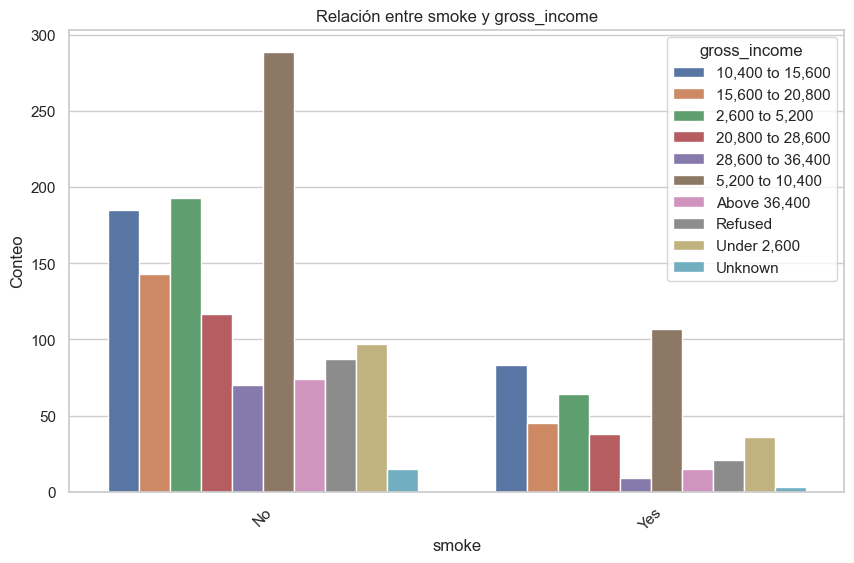

In [ ]:
# Distribucion de fumadores vs no fumadores por ingresos brutos.

plot_categorical_relationship_fin(df,"smoke","gross_income")

TEST CHI CUADRADO:

$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$

* h0 = hipotesis nula = no hay relacion sifnificante entre variables 
* h1 = hipotesis alternativa = existe relacion significante entre variables. 

In [ ]:
tabla_contingencia = pd.crosstab(df['smoke'], df['gross_income'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)




print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# Comprobar si la asociación es significativa
alpha = 0.05
if p < alpha:
    print("\nExiste una asociación significativa variables")
else:
    print("\nNo existe una asociación significativa entre variables.")

Valor Chi-Cuadrado: 19.835003487043217
P-Value: 0.018958411214945795
Grados de Libertad: 9
Tabla de Frecuencias Esperadas:
 [[201.27735068 141.19455943 193.01596688 116.41040804  59.33175636
  297.40981668  66.84210526  81.11176818  99.88764045  13.51862803]
 [ 66.72264932  46.80544057  63.98403312  38.58959196  19.66824364
   98.59018332  22.15789474  26.88823182  33.11235955   4.48137197]]

Existe una asociación significativa variables


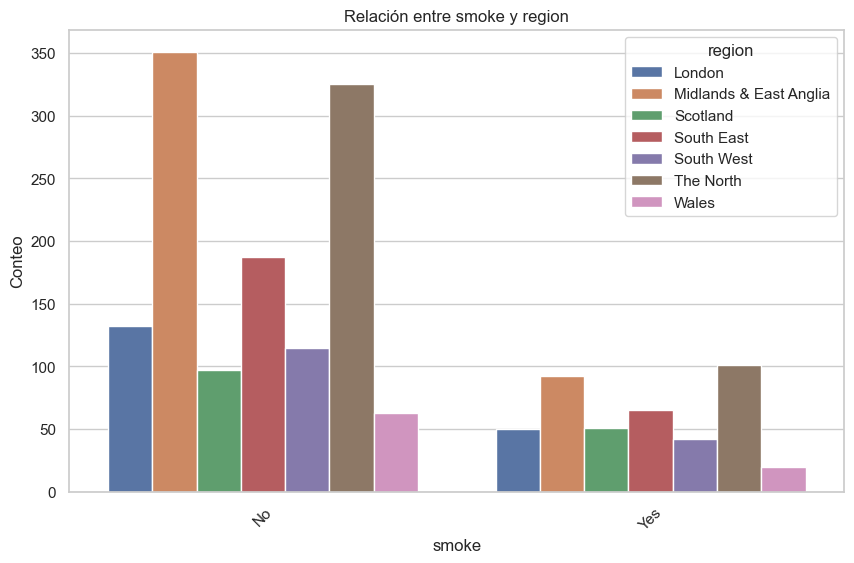

In [ ]:
# Distribucion de fumadores vs no fumadores por region.

plot_categorical_relationship_fin(df,"smoke","region")

TEST CHI CUADRADO:

$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$

* h0 = hipotesis nula = no hay relacion sifnificante entre variables 
* h1 = hipotesis alternativa = existe relacion significante entre variables. 

In [ ]:
tabla_contingencia = pd.crosstab(df['smoke'], df['region'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)




print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# Comprobar si la asociación es significativa
alpha = 0.05
if p < alpha:
    print("\nExiste una asociación significativa variables")
else:
    print("\nNo existe una asociación significativa entre variables.")

Valor Chi-Cuadrado: 12.670773956002321
P-Value: 0.04857240169227479
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[136.68835009 332.70845653 111.15316381 189.26079243 117.91247782
  319.94086339  62.33589592]
 [ 45.31164991 110.29154347  36.84683619  62.73920757  39.08752218
  106.05913661  20.66410408]]

Existe una asociación significativa variables


En la presentacion desarrollaremos las visualizaciones.
veamos algunos analisis especificos sobre los fumadores.

In [ ]:
df_fumadores = df[df["smoke"] == "Yes"]
df_fumadores.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,average_income
1451,Male,16,Single,No Qualification,English,White,"Under 2,600",South West,Yes,6.0,6.0,Both/Mainly Packets,1300.0
209,Female,16,Single,GCSE/O Level,British,White,"5,200 to 10,400",The North,Yes,12.0,12.0,Packets,7800.0
772,Male,16,Single,No Qualification,English,White,"Under 2,600",Midlands & East Anglia,Yes,25.0,20.0,Hand-Rolled,1300.0
492,Female,16,Single,GCSE/CSE,British,White,"Under 2,600",Midlands & East Anglia,Yes,2.0,2.0,Packets,1300.0
1645,Female,17,Single,GCSE/CSE,Scottish,White,"5,200 to 10,400",Scotland,Yes,20.0,15.0,Packets,7800.0


In [ ]:
df_fumadores["type"].value_counts()

type
Packets                    297
Hand-Rolled                 72
Both/Mainly Packets         42
Both/Mainly Hand-Rolled     10
Name: count, dtype: int64

type
Packets                    297
Hand-Rolled                 72
Both/Mainly Packets         42
Both/Mainly Hand-Rolled     10
Name: count, dtype: int64


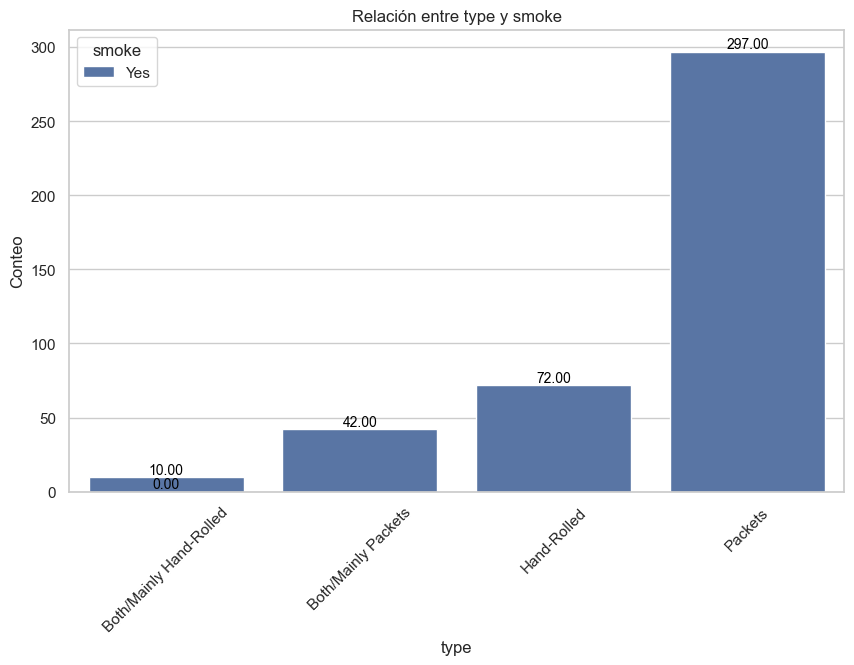

In [ ]:
# Distribucion del tipo de tabaco entre fumadores.

tipo_fumadores = df_fumadores["type"].value_counts()
print(tipo_fumadores)
plot_categorical_relationship_fin(df,"type","smoke" ,show_values= True)

count    421.000000
mean      13.750594
std        9.388292
min        0.000000
25%        7.000000
50%       12.000000
75%       20.000000
max       55.000000
Name: amt_weekdays, dtype: float64


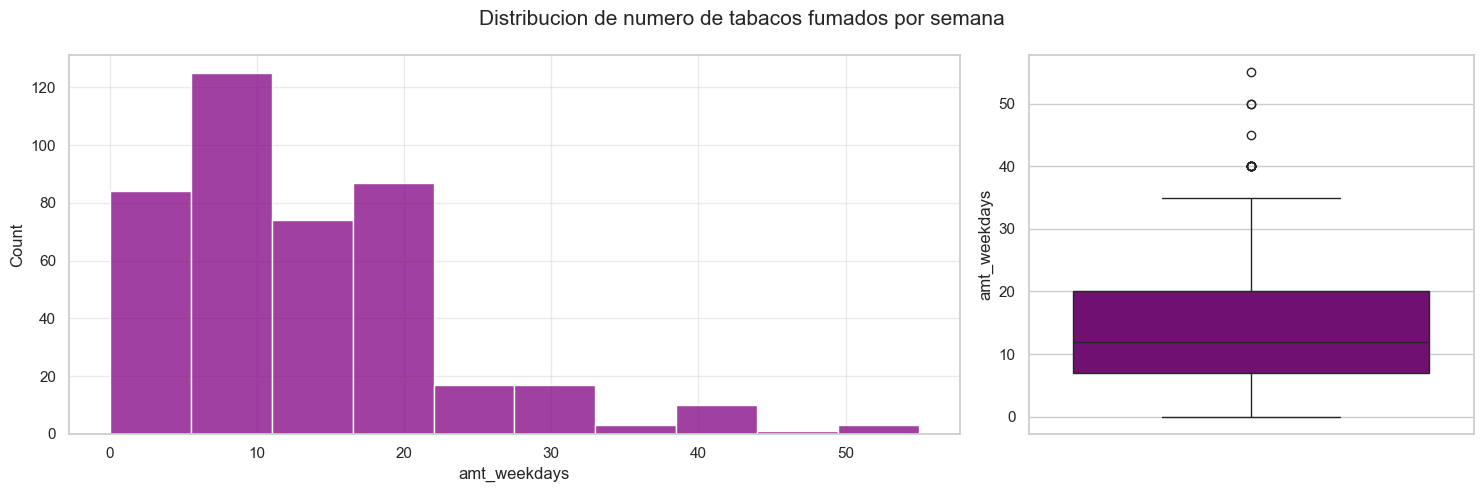

In [ ]:
# Distribucion de cigarros fumados en la muestra por semana.
medidas_weekdays = df_fumadores["amt_weekdays"].describe()
print(medidas_weekdays)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df_fumadores, x=smoker['amt_weekdays'], ax=axes[0], color='purple', bins=10)
axes[0].grid(alpha=0.4)

sns.boxplot(data=df_fumadores, y=df_fumadores['amt_weekdays'], ax=axes[1], color='purple')

figure.suptitle('Distribucion de numero de tabacos fumados por semana', fontsize=15)
plt.tight_layout()
plt.show()

count    421.000000
mean      16.410926
std        9.892988
min        0.000000
25%       10.000000
50%       15.000000
75%       20.000000
max       60.000000
Name: amt_weekends, dtype: float64


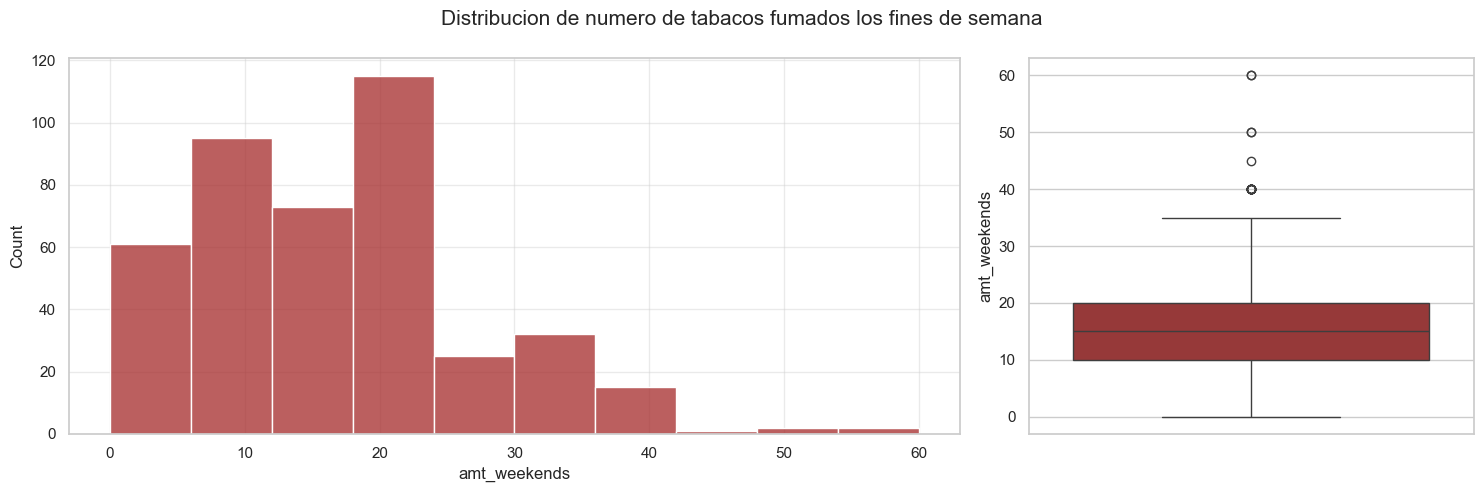

In [ ]:
# Distribucion de cigarros fumados en la muestra por semana.
medidas_weekends = df_fumadores["amt_weekends"].describe()
print(medidas_weekends)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df_fumadores, x=smoker['amt_weekends'], ax=axes[0], color='brown', bins=10)
axes[0].grid(alpha=0.4)

sns.boxplot(data=df_fumadores, y=df_fumadores['amt_weekends'], ax=axes[1], color='brown')

figure.suptitle('Distribucion de numero de tabacos fumados los fines de semana', fontsize=15)
plt.tight_layout()
plt.show()

       amt_weekdays  amt_weekends
count    421.000000    421.000000
mean      13.750594     16.410926
std        9.388292      9.892988
min        0.000000      0.000000
25%        7.000000     10.000000
50%       12.000000     15.000000
75%       20.000000     20.000000
max       55.000000     60.000000


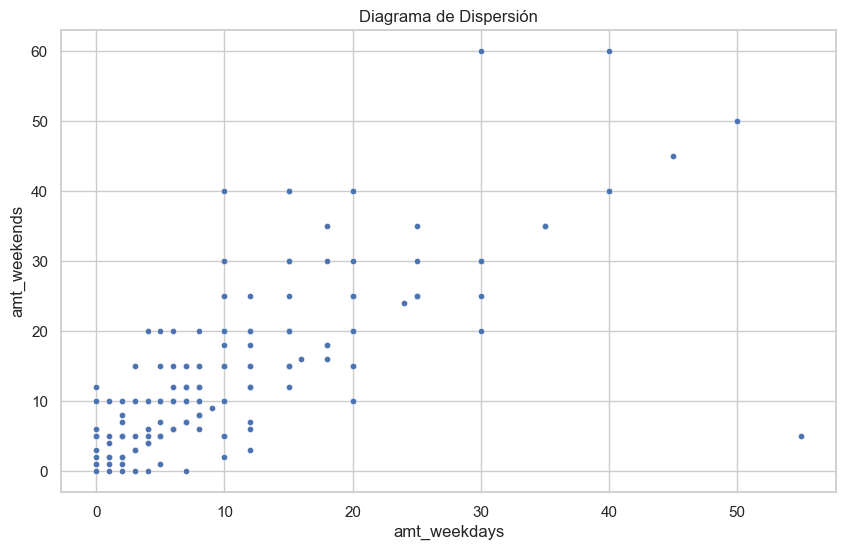

In [ ]:
# Comparacion entre cigarros consumidos entre semana y fines de semana

comparacion = df_fumadores[["amt_weekdays","amt_weekends"]].describe()
print(comparacion)
grafico_dispersion_con_correlacion(df_fumadores,"amt_weekdays","amt_weekends", 20)

In [ ]:
from scipy.stats import pearsonr

pearsonr(df_fumadores["amt_weekends"], df_fumadores["amt_weekdays"], alternative= "less")

PearsonRResult(statistic=0.8020521245005171, pvalue=1.0)

Podemos observar en la grafica y viendo su correlacion con Pearsonr, que tenemos una tendencia positiva, es decir:  
 las personas que fuman más cigarrillos entre semana también tienden a fumar más cigarrillos los fines de semana, y las personas que fuman menos cigarrillos entre semana tienden a fumar menos los fines de semana. Esta relación positiva fuerte sugiere que el comportamiento de fumar está altamente correlacionado entre semana y fines de semana.


1. La edad promedio de las muestras es de 49.84 años.
2. El análisis del estado civil revela que el 48.0% de las muestras están casadas, seguido por el 25.3% categorizado como soltero.
3. En cuanto al nivel educativo alcanzado, la distribución es la siguiente: el 34.7% de las muestras carecen de una calificación formal, el 18.2% poseen una calificación de GCSE/O Level y el 15.5% han obtenido un título universitario.
4. En términos de nacionalidad, la mayoría de las muestras (49.3%) se identifican como inglesas, siendo el segundo grupo más grande el británico, que representa el 31.8% de la muestra.
5. La composición étnica es predominantemente blanca, con más del 90% de las muestras, mientras que otros grupos étnicos colectivamente constituyen menos del 10%.
6. El análisis de ingresos brutos indica que el tramo de ingresos de 5200-10400 es el más grande, abarcando el 23.4% de las muestras. Le siguen de cerca los tramos de 10400-15600 y 2600-5200, que constituyen el 15.8% y el 15.2%, respectivamente.
7. Regionalmente, aproximadamente el 50% de los datos provienen de las Midlands y el Este de Anglia (26.2%), y la región del Norte contribuye con el 25.2% al conjunto de datos.
8. El análisis estadístico revela asociaciones significativas entre el estado de fumador y varios factores demográficos, incluyendo la edad, nivel educativo, nacionalidad, ingresos brutos y región. Sin embargo, no se encuentra ninguna asociación significativa entre el estado de fumador y el género o la etnia (blanca vs. otros).
9. Los paquetes emergen como el tipo predominante de cigarrillos fumados entre los fumadores encuestados, constituyendo una mayoría sustancial con el 70.5% del total de la muestra.
10. En promedio, los fumadores consumen 16.41 cigarrillos por día los fines de semana y 13.75 cigarrillos los días laborables.
11. A partir de la prueba t, se revela una diferencia significativa en el número de cigarrillos fumados por día entre los fines de semana y los días laborables dentro de la población estudiada, subrayando una notable variación en el comportamiento de fumar a través de estas categorías temporales.
